<a id="1"></a>
<div style="border: 3px solid #ff0000; border-radius: 10px; padding: 20px; background-color: #ffcccc; text-align: center; margin: 20px 0; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: black; font-size: 32px; font-family: Helvetica, Arial, sans-serif; margin: 20px 0;">
        <strong>Customer Lifetime Value Prediction</strong>
    </h1>
    <p style="font-family: Helvetica, Arial, sans-serif; color: #000000; font-size: 110%;">
        This notebook introduces a new dimension called Inter-Purchase Time (T) to the traditional RFM (Recency, Frequency, Monetary) model. The new attribute "T" captures customer purchasing behavior within their shopping cycle.<br>
        While the RFM model has been widely used, its implementation can be challenging due to human behavior's unpredictability. Incorporating criteria that better explain buying habits is crucial. Let’s dive in!<br>
    </p>
</div>

<a id="2"></a>
<div style="border: 3px solid #ff0000; border-radius: 10px; padding: 20px; background-color: #ffcccc; text-align: center; margin: 20px 0; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <h1 style="color: black; font-size: 32px; font-family: Helvetica, Arial, sans-serif; margin: 20px 0;">
        <strong>Introduction</strong>
    </h1>
    <p style="font-family: Helvetica, Arial, sans-serif; color: #000000; font-size: 110%;">
        Customer segmentation involves dividing customers into distinct groups based on shared characteristics, such as demographics, interests, or behaviors. This process helps businesses target their marketing efforts and resources effectively.<br>
        The digital business landscape has grown rapidly, making it crucial to maintain long-term customer relationships. Poor market segmentation is a key reason for new product launch failures. Thus, improving consumer behavioral studies and engagement is essential.
    </p>
</div>


<a id="1"></a>
<div style="display: fill; border-radius: 8px; background: linear-gradient(135deg, #1D3557, #457B9D); font-size: 1.2em; font-family: Helvetica, Arial, sans-serif; letter-spacing: 0.5px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); text-align: center; padding: 16px; color: #F1FAEE; margin: 20px 0;">
    <strong>Importing The Libraries</strong>
</div>


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from numpy import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="2"></a>
<div style="display: fill; border-radius: 8px; background: linear-gradient(135deg, #1D3557, #457B9D); font-size: 1.2em; font-family: Helvetica, Arial, sans-serif; letter-spacing: 0.5px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); text-align: center; padding: 16px; color: #F1FAEE; margin: 20px 0;">
    <strong>Loading and Reading the Dataset</strong>
</div>


In [2]:
import pandas as pd

# lETS READ THE DATASET...
try:
    data = pd.read_excel("C:\\Users\\DELL\\Desktop\\CSI\\Final_project\\online_retail_II.xlsx")
    print("-" * 50)
    print("Data imported successfully!!")
    print(data.head(3).style.set_properties(**{"background-color": "#cd5c5c", "color": "black", "border-color": "black"}))
except Exception as e:
    print("An error occurred:", e)


--------------------------------------------------
Data imported successfully!!


<a id="3"></a>
<div style="display: fill; border-radius: 8px; background: linear-gradient(135deg, #1D3557, #457B9D); font-size: 1.2em; font-family: Helvetica, Arial, sans-serif; letter-spacing: 0.5px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); text-align: center; padding: 16px; color: #F1FAEE; margin: 20px 0;">
    <strong>Exploring Information of the Dataset</strong>
</div>


In [3]:
pd.set_option('display.max_columns', None) 
def data_overview(df, head=5):
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print("DATA TYPES".center(125,'-'))
    print(data.dtypes.value_counts())
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    print("DATA INFO".center(125,'-'))
    print(df.info())
    
    
data_overview(data)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:525461
Columns:8
------------------------------------------------------------ HEAD -----------------------------------------------------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 200

<a id="4"></a>
<div style="display: fill; border-radius: 8px; background: linear-gradient(135deg, #1D3557, #457B9D); font-size: 1.2em; font-family: Helvetica, Arial, sans-serif; letter-spacing: 0.5px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); text-align: center; padding: 16px; color: #F1FAEE; margin: 20px 0;">
    <strong>Data Wrangling </strong>
</div>


<h1 style="color: #1D3557; font-size: 24px; font-family: Helvetica, Arial, sans-serif; text-align: left;">
    🔍 <strong>Dealing with Missing Values</strong>
</h1>


In [4]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",data.shape)
data.dropna(subset="Customer ID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",data.shape)

Shape of data before removing NaN's CustomerID (525461, 8)
Shape of data after removing NaN's CustomerID (417534, 8)


In [5]:
print("Missing values in each column after cleaning customerID :\n",data.isnull().sum())

Missing values in each column after cleaning customerID :
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


<h1 style="color: #1D3557; font-size: 24px; font-family: Helvetica, Arial, sans-serif; text-align: left;">
    🚫 <strong>Removing Canceled Products from Invoice</strong>
</h1>


In [6]:
#using one's compliment operator (~) we can unselect all the Invoice column which doesnt contain "C".
data = data[~data.Invoice.str.contains('C',na=False)]
print("Dataset is free from cancelled products information")

Dataset is free from cancelled products information


<h1 style="color: #1D3557; font-size: 24px; font-family: Helvetica, Arial, sans-serif; text-align: left;">
    🔄 <strong>Removing Duplicates</strong>
</h1>


In [7]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",data.duplicated().sum())
data = data.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",data.duplicated().sum())

Number of duplicates before cleaning: 6748
Number of duplicates after cleaning: 0


<h1 style="color: #1D3557; font-size: 24px; font-family: Helvetica, Arial, sans-serif; text-align: left;">
    ⚠️ <strong>Checking for Negative Values</strong>
</h1>


In [8]:
print("Negative value in Quantity is:",(data.Quantity<0).sum())
print("Negative value in Price is:",(data.Price<0).sum())

Negative value in Quantity is: 0
Negative value in Price is: 0


<h1 style="color: #1D3557; font-size: 24px; font-family: Helvetica, Arial, sans-serif; text-align: left;">
    🧹 <strong>Cleaning Outliers</strong>
</h1>


In [9]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

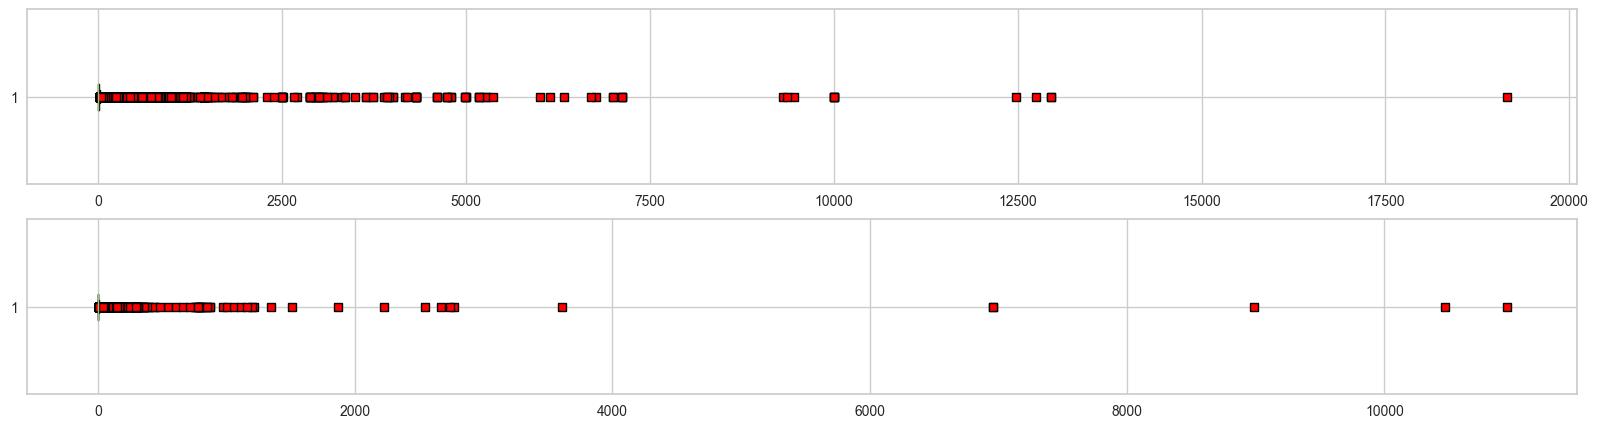

In [10]:
# Observing them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","Price"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [11]:
# Applying the functions for remove the outlier.
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "Price")

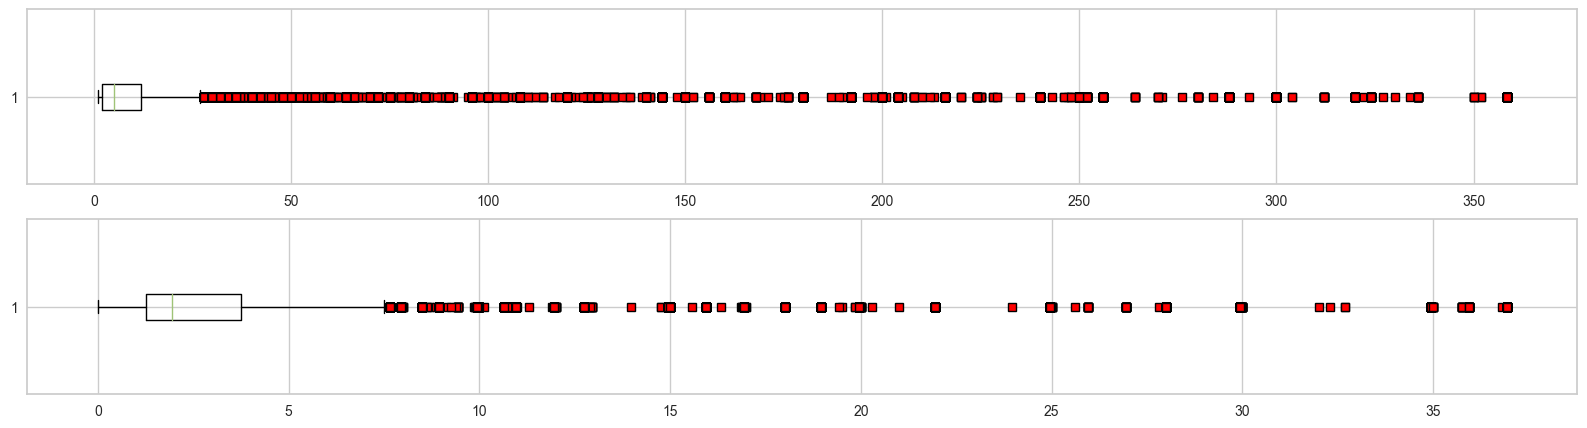

In [12]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

<a id="5"></a>
<div style="display: fill; border-radius: 8px; background: linear-gradient(135deg, #1D3557, #457B9D); font-size: 1.2em; font-family: Helvetica, Arial, sans-serif; letter-spacing: 0.5px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); text-align: center; padding: 16px; color: #F1FAEE; margin: 20px 0;">
    <strong style="font-size: 1.5em;">EDA Feature Engineering </strong>
</div>


In [13]:
#Creating new feature Revenue
data["Revenue"] = data["Quantity"] * data["Price"]

In [14]:
#Creating Features for RFM Model
#Changing data type to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [15]:
print("Max date :",data["InvoiceDate"].max())
print("Min date :",data["InvoiceDate"].min())

Max date : 2010-12-09 20:01:00
Min date : 2009-12-01 07:45:00


In [16]:
#RFM Featuring

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM features with subset of customerID
RFM = data.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                 'Invoice': lambda x: x.nunique(), 
                                                 "Revenue": lambda x: x.sum()})
                                
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)

RFM.reset_index().head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Customer ID,Recency,Frequency,Monetary
0,12346.000000,529,11,372.860000
1,12347.000000,367,2,1323.320000
2,12348.000000,438,1,222.160000
3,12349.000000,407,3,2295.020000
4,12351.000000,375,1,300.930000


<a id="6"></a>
<div style="display: fill; border-radius: 8px; background: linear-gradient(135deg, #1D3557, #457B9D); font-size: 1.2em; font-family: Helvetica, Arial, sans-serif; letter-spacing: 0.5px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); text-align: center; padding: 16px; color: #F1FAEE; margin: 20px 0;">
    <strong style="font-size: 1.5em;">Introducing New Feature:Interpurchase Time  </strong>
</div>

<p style="font-family: Helvetica, Arial, sans-serif; color: #000000; font-size: 110%; text-align: center; margin: 10px 0;">
    The new feature, Interpurchase Time, represents the average time gap between a customer's total shopping trips. It is calculated using the following formula:
</p>

<p style="font-family: Helvetica, Arial, sans-serif; color: #000000; font-size: 110%; text-align: center; margin: 10px 0;">
    T = L / (F - 1) = (Tn - T1) / (F - 1)
</p>

<div style="text-align: left; font-family: Helvetica, Arial, sans-serif; color: #000000; font-size: 110%; margin: 10px 0;">
    <ul style="list-style-type: disc;">
        <li>T → Interpurchase Time</li>
        <li>L → Shopping Cycle</li>
        <li>F → Frequency</li>
        <li>T1 → First Purchase</li>
        <li>Tn → Last Purchase</li>
    </ul>
</div>

<p style="font-family: Helvetica, Arial, sans-serif; color: #000000; font-size: 110%; text-align: center; margin: 20px 0;">
    Note: This calculation is based on customers who have made more than one purchase.
</p>


In [17]:
RFM = RFM[(RFM["Frequency"]>1)]
RFM.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary
Customer ID,,,
12346.000000,529,11,372.860000
12347.000000,367,2,1323.320000
12349.000000,407,3,2295.020000
12352.000000,375,2,343.800000
12356.000000,380,3,3560.300000


In [18]:
Shopping_Cycle = data.groupby('Customer ID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})

In [19]:
RFM["Shopping_Cycle"] = Shopping_Cycle
RFM.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Shopping_Cycle
Customer ID,,,,
12346.000000,529,11,372.860000,196
12347.000000,367,2,1323.320000,37
12349.000000,407,3,2295.020000,181
12352.000000,375,2,343.800000,16
12356.000000,380,3,3560.300000,44


In [20]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]
RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]
RFMT.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Interpurchase_Time
Customer ID,,,,
12346.000000,529,11,372.860000,17
12347.000000,367,2,1323.320000,18
12349.000000,407,3,2295.020000,60
12352.000000,375,2,343.800000,8
12356.000000,380,3,3560.300000,14


<a id="7"></a>
<div style="display: fill; border-radius: 8px; background: linear-gradient(135deg, #1D3557, #457B9D); font-size: 1.2em; font-family: Helvetica, Arial, sans-serif; letter-spacing: 0.5px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); text-align: center; padding: 16px; color: #F1FAEE; margin: 20px 0;">
    <strong style="font-size: 1.5em;">Modelling with KMeans Algorithm </strong>
</div>


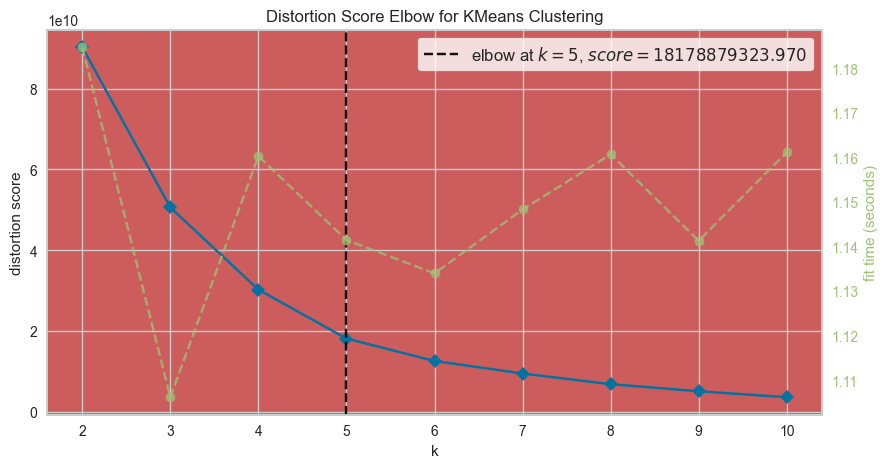

Therefore K = 4


In [21]:
# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(RFMT)
Elbow_M.show()
print("Therefore K = 4")

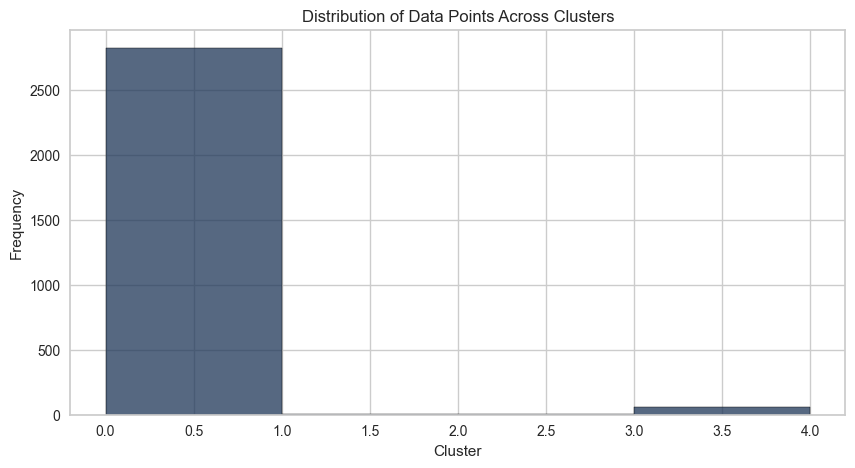

In [22]:
import seaborn as sns

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(RFMT)

plt.figure(figsize=(10, 5))
sns.histplot(clusters, bins=range(5), kde=False, color="#1D3557")
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Data Points Across Clusters')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming RFMT is a DataFrame
RFMT_array = RFMT.to_numpy()  # Convert DataFrame to NumPy array

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(RFMT_array)
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 5))
plt.scatter(RFMT_array[:, 0], RFMT_array[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Cluster Centers')
plt.grid(True)
plt.show()


In [ ]:
#Fitting KMeans Model
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(RFMT)

In [ ]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

<a id="8"></a>
<div style="display: fill; border-radius: 8px; background: linear-gradient(135deg, #1D3557, #457B9D); font-size: 1.2em; font-family: Helvetica, Arial, sans-serif; letter-spacing: 0.5px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); text-align: center; padding: 16px; color: #F1FAEE; margin: 20px 0;">
    <strong style="color: #F1FAEE;">
        Model Evaluation 
    </strong>
</div>


In [ ]:
# how well the clusters are?:
#centriods
kmeans.cluster_centers_

In [ ]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show 

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Fit the model
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(RFMT)
visualizer.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(RFMT, kmeans.labels_)
print("Davies-Bouldin Index :", db_index)


In [ ]:
from sklearn.utils import shuffle

# Perturb the data slightly
perturbed_data = shuffle(RFMT, random_state=42)

# Fit the KMeans model again
kmeans_perturbed = KMeans(n_clusters=4, random_state=42)
kmeans_perturbed.fit(perturbed_data)

# Compare cluster labels
stability_score = silhouette_score(RFMT, kmeans_perturbed.labels_, metric='euclidean')
print("Cluster Stability Score :", stability_score)
